In [ ]:
import pandas as pd

df = pd.read_csv('Datasets\penguins_size.csv')
df.sample(10)

<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
C:\Users\User\AppData\Local\Temp\ipykernel_16532\3018280311.py:1: SyntaxWarning: invalid escape sequence '\p'
  df = pd.read_csv('Datasets\penguins_size.csv')


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
217,Chinstrap,Dream,50.8,19.0,210,4100,MALE
278,Gentoo,Biscoe,50.4,15.3,224,5550,MALE
70,Adelie,Torgersen,39.7,18.4,190,3900,MALE
334,Gentoo,Biscoe,55.1,16.0,230,5850,MALE
143,Adelie,Dream,37.3,16.8,192,3000,FEMALE
68,Adelie,Torgersen,41.8,19.4,198,4450,MALE
35,Adelie,Dream,38.8,20.0,190,3950,MALE
299,Gentoo,Biscoe,49.1,14.5,212,4625,FEMALE
232,Gentoo,Biscoe,48.4,14.6,213,5850,MALE
333,Gentoo,Biscoe,46.2,14.1,217,4375,FEMALE


In [5]:

df['sex'] = df['sex'].fillna(df['sex'].mode)
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X = df[['species' ,'island', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y= df['sex']
X.shape,y.shape

((342, 6), (342,))

In [7]:
X = pd.get_dummies(X)
y = y.map({'FEMALE': 0, 'MALE': 1}) # Convert target to binary: Female → 0, Male → 1


In [8]:
y.isnull().sum()

np.int64(8)

In [9]:
y = y.fillna(y.mode()[0])
y.isnull().sum()
#yc = y.dropna()
#X.shape,yc

np.int64(0)

In [10]:
X.shape,y.shape

((342, 10), (342,))

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2,random_state = 44)
log_reg = LogisticRegression(max_iter = 1000)
log_reg.fit(X_train,y_train)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [12]:
y_predicted = log_reg.predict(X_test)
y_predicted

array([1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1.,
       1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0.,
       1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0.,
       1.])

In [13]:
from sklearn.metrics import classification_report
cv = classification_report(y_test, y_predicted, output_dict= True)
dff = pd.DataFrame(cv).transpose()
dff

,precision,recall,f1-score,support
0.0,0.866667,0.838710,0.852459,31.000000
1.0,0.871795,0.894737,0.883117,38.000000
accuracy,0.869565,0.869565,0.869565,0.869565
macro avg,0.869231,0.866723,0.867788,69.000000
weighted avg,0.869491,0.869565,0.869343,69.000000


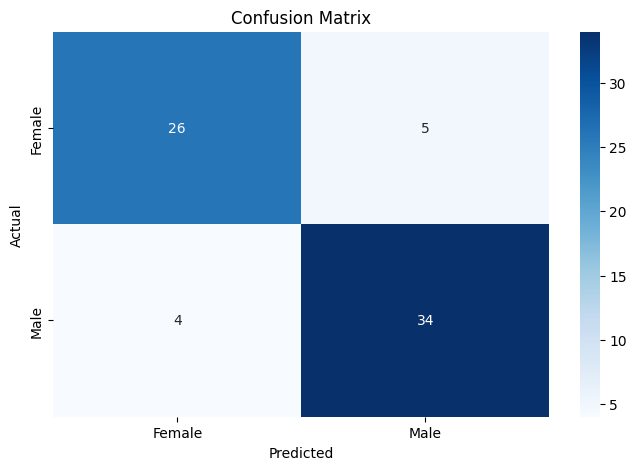

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Create confusion matrix
cm = confusion_matrix(y_test, y_predicted)

# Plot using seaborn
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Female', 'Male'], yticklabels=['Female', 'Male'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


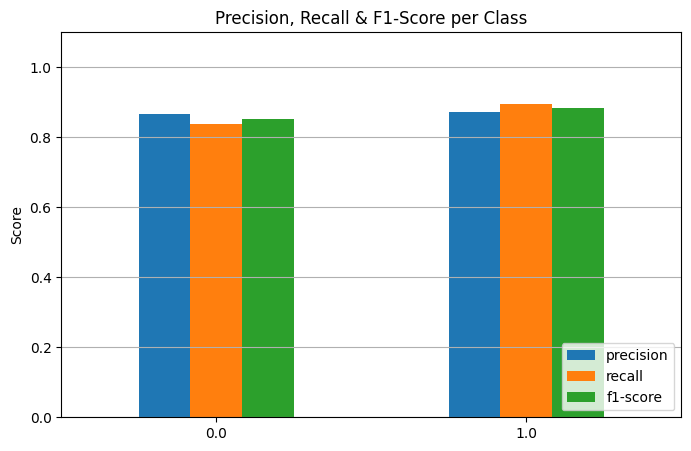

In [15]:
# Drop support row to avoid plotting it
dff_plot = dff.drop(['accuracy', 'macro avg', 'weighted avg'], errors='ignore')

# Plot precision, recall, f1-score
dff_plot[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(8, 5))
plt.title("Precision, Recall & F1-Score per Class")
plt.ylabel("Score")
plt.ylim(0, 1.1)
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()


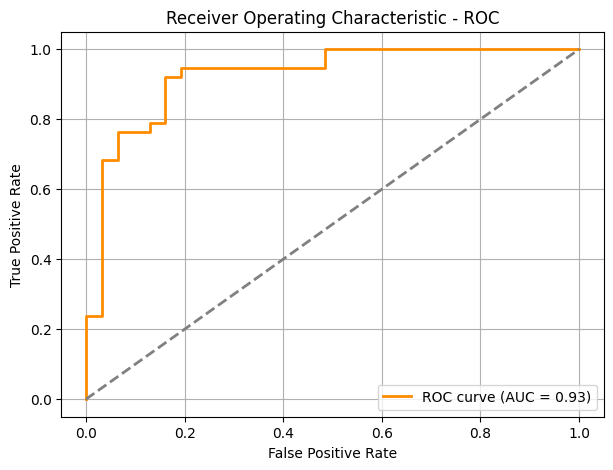

In [16]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt

# Predict probabilities instead of class labels
y_prob = log_reg.predict_proba(X_test)[:, 1]  # Probability for class '1' (Male)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()
